In [1]:
import numpy as np
import matplotlib.pyplot as plt
xmax = 1.0
xmin = 0.0
dx = 0.01

x = np.arange(xmin+dx, xmax+dx, dx)

A = 0.5 * ( xmax + xmin )
B = 0.5 * ( xmax - xmin )

Kotsuki et al. (2018)
$$
x=1/2(x_{\rm max} + x_{\rm min}) + 1/2(x_{\rm max}-x_{\rm min})\tanh(y)\\
x=A+B\tanh(y)
$$
where $x$ is a control variable in physical scape, $y$ is a transformed control variable, $x_{\rm max}$ and $x_{\rm min}$ are the maximum and minimum values for x.  
  
Inversely, 
$$
\tanh(y) = (2x-(x_{\rm max} + x_{\rm min}))/(x_{\rm max}-x_{\rm min})\\
y = 1/2\ln \frac{(1+z)}{(1-z)}
$$
where $z=(2x-(x_{\rm max} + x_{\rm min}))/(x_{\rm max}-x_{\rm min})$, or $z=\frac{x-A}{B}$

In [17]:
def y2x_k( x ):
    return( A+B*np.tanh(x) )

def x2z( x ):
    return( ( x-A ) / B )

def z2x( z ):
    return( (z*B+A) )

def x2y_k( x ):
    z = x2z( x )
    return( 0.5*np.log( (1+z)/(1-z) ) )


/apps/COMMON/opt/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


Text(0, 0.5, 'transformed control variable (y)')

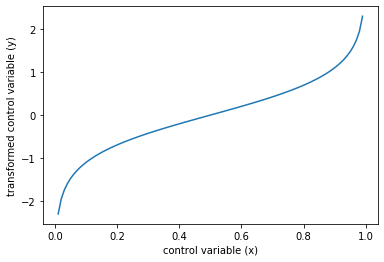

In [18]:
y_k = x2y_k(x)
_ = plt.plot( x, y_k)
plt.xlabel( "control variable (x)")
plt.ylabel( "transformed control variable (y)")

What if use the above transformation for analysis?  
Analysis equation is:
$$
y_a = y_b + \kappa (y_o - y_b).
$$
This can be rewritten by $z(x)$:
$$
\begin{align}
1/2\ln \frac{(1+z_a)}{(1-z_a)} &= 1/2\ln \frac{(1+z_b)}{(1-z_b)} +\kappa \left( 1/2\ln \frac{(1+z_o)}{(1-z_o)} - 1/2\ln \frac{(1+z_b)}{(1-z_b)}\right)\\
\ln \frac{(1+z_a)}{(1-z_a)} &= \ln \frac{(1+z_b)}{(1-z_b)} +\kappa \left( \ln \frac{(1+z_o)(1-z_b)}{(1-z_o)(1+z_b)} \right)\\
\ln \frac{(1+z_a)}{(1-z_a)} &= \ln \frac{(1+z_o)^{\kappa}(1-z_b)^{\kappa-1}}{(1-z_o)^{\kappa}(1+z_b)^{\kappa-1}}\\
\frac{(1+z_a)}{(1-z_a)} &= \frac{(1+z_o)^{\kappa}(1-z_b)^{\kappa-1}}{(1-z_o)^{\kappa}(1+z_b)^{\kappa-1}}\\
\left( 1+ \frac{(1+z_o)^{\kappa}(1-z_b)^{\kappa-1}}{(1-z_o)^{\kappa}(1+z_b)^{\kappa-1}}\right)z_a &= \frac{(1+z_o)^{\kappa}(1-z_b)^{\kappa-1}}{(1-z_o)^{\kappa}(1+z_b)^{\kappa-1}}-1\\
\left( (1-z_o)^{\kappa}(1+z_b)^{\kappa-1}+ (1+z_o)^{\kappa}(1-z_b)^{\kappa-1}\right)z_a &= (1+z_o)^{\kappa}(1-z_b)^{\kappa-1}-(1-z_o)^{\kappa}(1+z_b)^{\kappa-1}\\
z_a &= \frac{ (1+z_o)^{\kappa}(1-z_b)^{\kappa-1}-(1-z_o)^{\kappa}(1+z_b)^{\kappa-1} }{(1-z_o)^{\kappa}(1+z_b)^{\kappa-1}+ (1+z_o)^{\kappa}(1-z_b)^{\kappa-1}}\\
\end{align}
$$

In [19]:
def get_za( zb, zo, kappa ):
    tmp = np.power( 1+zo, kappa) * np.power( 1-zb, kappa-1) - np.power( 1-zo, kappa )* np.power(1+zb, kappa-1)
    return( tmp / (np.power( 1-zo, kappa) * np.power( 1+zb, kappa-1) + np.power( 1+zo, kappa )* np.power(1-zb, kappa-1)
  ) )

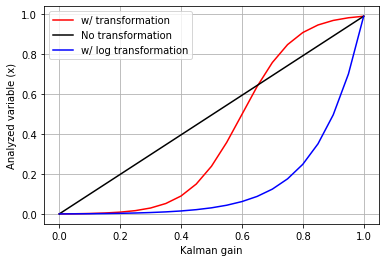

In [50]:
xb = 0.001
xo = 0.99

kappa_l = np.arange( 0.0, 1.05, 0.05 )

xa_l_not = xb + kappa_l*( xo - xb)

xa_log_l = np.log( xb ) + kappa_l*( np.log( xo ) - np.log( xb ) )
xa_log_l = np.exp( xa_log_l)

zb = x2z( xb )
zo = x2z( xo )

za_l = get_za( zb, zo, kappa_l)
xa_l = z2x( za_l )

_ = plt.plot( kappa_l, xa_l, label="w/ transformation", color='r')
_ = plt.plot( kappa_l, xa_l_not, label="No transformation", color='k')
_ = plt.plot( kappa_l, xa_log_l, label="w/ log transformation", color='b')

_ = plt.ylabel( "Analyzed variable (x)")
_ = plt.xlabel( "Kalman gain")
_ = plt.grid('on')
_ = plt.legend( loc='upper left')
_ = plt.suptitle( "" )